In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep = ';')

In [3]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Data Cleansing

## Missing Value

In [4]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Missing value di kolom Income akan diisi dengan nilai median**

In [5]:
df['Income'].fillna(df['Income'].median(), inplace = True)

In [6]:
#Cek jumlah missing value setelah preprocessing
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Duplicated Data

In [8]:
df.duplicated().any()

False

Dalam dataset ini tidak terdapat duplicated data

## Outliers

Dalam tahap ini akan dilakukan :
* Penanganan outliers di kolom `Income`, dan `Year_Birth` dengan menghapus outlier menggunakan IQR
* Penanganan outliers di kolom `NumDealsPurchases`, `NumWebPurchases` , `NumCatalogPurchases` , `NumStorePurchases` , `NumWebVisitsMonth` berdasarkan Z-score

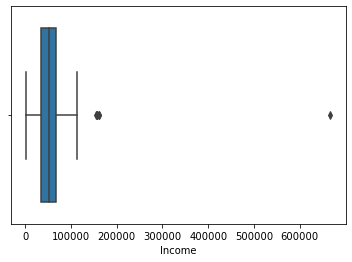

In [9]:
sns.boxplot(x = 'Income', data = df);

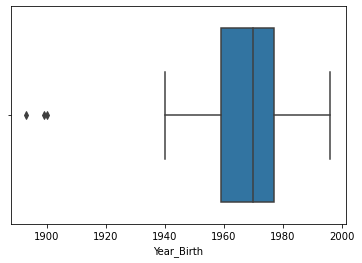

In [10]:
sns.boxplot(x = 'Year_Birth', data = df);

### Penanganan Outlier Berdasarkan IQR

**Penanganan Outlier Kolom `Income`**

In [11]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

filtered_entries = ((df['Income'] >= low_limit) & (df['Income'] <= high_limit))
df = df[filtered_entries]

In [12]:
df.shape

(2232, 29)

**Penanganan Outlier Kolom `Year_Birth`**

In [13]:
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

filtered_entries = ((df['Year_Birth'] >= low_limit) & (df['Year_Birth'] <= high_limit))
df = df[filtered_entries]

In [14]:
df.shape

(2229, 29)

**Cek boxplot dan distribusi kolom `Income` setelah dilakukan preprocessing**

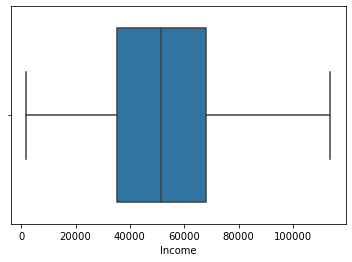

In [15]:
#Cek boxplot dan distribusi setelah dilakukan preprocessing
sns.boxplot(x = 'Income', data = df);


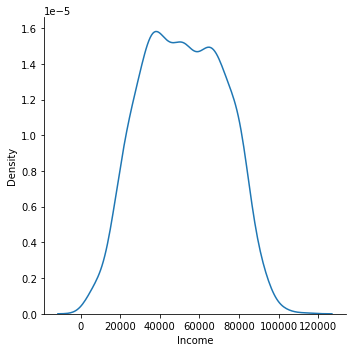

In [16]:
sns.displot(x='Income', data=df, kind='kde');

**Cek boxplot dan distribusi kolom `Year_Birth` setelah dilakukan preprocessing**

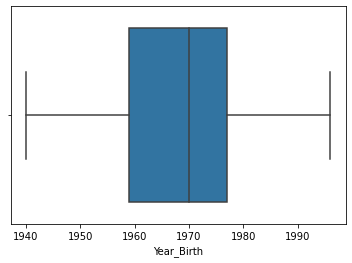

In [17]:
#Cek boxplot dan distribusi setelah dilakukan preprocessing
sns.boxplot(x = 'Year_Birth', data = df);

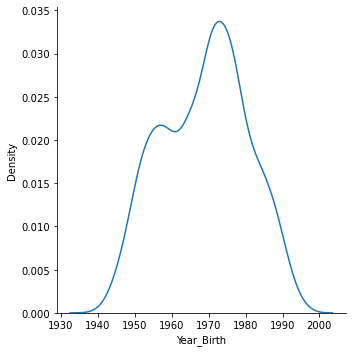

In [18]:
sns.displot(x='Year_Birth', data=df, kind='kde');

### Penanganan Outlier Berdasarkan Z-Score

In [19]:
from scipy import stats

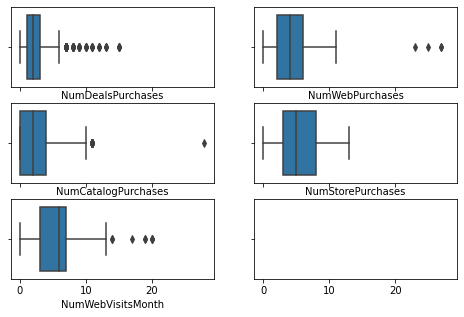

In [20]:
#Visualisasi boxplot SEBELUM dilakukan penanganan outlier
fig, axes = plt.subplots(3, 2, 
                     figsize=(8, 5), sharex=True, sharey=True)

sns.boxplot(x = 'NumDealsPurchases', data = df, ax=axes[0][0])
sns.boxplot(x = 'NumWebPurchases', data = df, ax=axes[0][1])
sns.boxplot(x = 'NumCatalogPurchases', data = df, ax=axes[1][0])
sns.boxplot(x = 'NumStorePurchases', data = df, ax=axes[1][1])
sns.boxplot(x = 'NumWebVisitsMonth', data = df, ax=axes[2][0]);

In [21]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
zscore_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
filtered_entries = np.array([True] * len(df))

for col in zscore_columns:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 2229
Jumlah baris setelah memfilter outlier: 2189


**Cek boxplot dan distribusi kolom `NumDealsPurchases`, `NumWebPurchases` , `NumCatalogPurchases` , `NumStorePurchases` , `NumWebVisitsMonth` setelah dilakukan preprocessing**

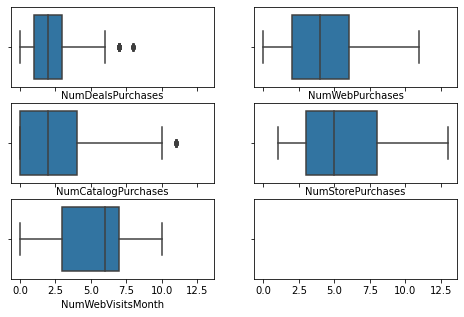

In [22]:
#Visualisasi boxplot SETELAH dilakukan penanganan outlier
fig, axes = plt.subplots(3, 2, 
                     figsize=(8, 5), sharex=True, sharey=True)

sns.boxplot(x = 'NumDealsPurchases', data = df, ax=axes[0][0])
sns.boxplot(x = 'NumWebPurchases', data = df, ax=axes[0][1])
sns.boxplot(x = 'NumCatalogPurchases', data = df, ax=axes[1][0])
sns.boxplot(x = 'NumStorePurchases', data = df, ax=axes[1][1])
sns.boxplot(x = 'NumWebVisitsMonth', data = df, ax=axes[2][0]);

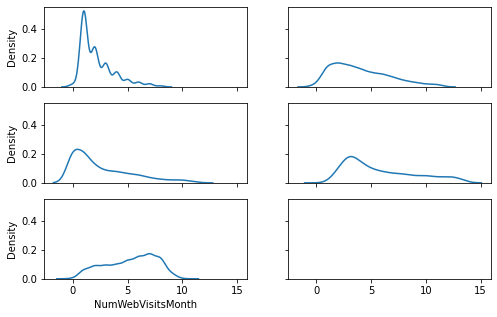

In [23]:
#Visualisasi distribusi SETELAH dilakukan penanganan outlier
fig, axes = plt.subplots(3, 2, 
                     figsize=(8, 5), sharex=True, sharey=True)

sns.kdeplot(x = 'NumDealsPurchases', data = df, ax=axes[0][0])
sns.kdeplot(x = 'NumWebPurchases', data = df, ax=axes[0][1])
sns.kdeplot(x = 'NumCatalogPurchases', data = df, ax=axes[1][0])
sns.kdeplot(x = 'NumStorePurchases', data = df, ax=axes[1][1])
sns.kdeplot(x = 'NumWebVisitsMonth', data = df, ax=axes[2][0]);

In [24]:
df.shape

(2189, 29)

## Feature Transformation

Pada kolom `MntWines` , `MntFruits` , `MntMeatProducts` , `MntFishProducts` , `MntSweetProducts` , `MntGoldProds` kolomnya cenderung right-skewed. Maka dari itu akan dilakukan log transformation

In [25]:
# Tranformasi kolom
df['log_MntWines'] = np.log(df['MntWines'])
df['log_MntFruits'] = np.log(df['MntFruits'])
df['log_MntMeatProducts'] = np.log(df['MntMeatProducts'])
df['log_MntFishProducts'] = np.log(df['MntFishProducts'])
df['log_MntSweetProducts'] = np.log(df['MntSweetProducts'])
df['log_MntGoldProds'] = np.log(df['MntGoldProds'])

C:\Users\Dewi Rahmawati\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Dewi Rahmawati\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Dewi Rahmawati\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Dewi Rahmawati\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Dewi Rahmawati\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Dewi Rahmawati\anaconda3\lib\site-packages\pandas\core\arraylike.p

In [26]:
#drop kolom nilai asli
df = df.drop(columns=['MntWines' , 'MntFruits' , 'MntMeatProducts' , 'MntFishProducts' , 'MntSweetProducts' , 'MntGoldProds'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,Complain,Z_CostContact,Z_Revenue,Response,log_MntWines,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,3,...,0,3,11,1,6.453625,4.477337,6.302619,5.147494,4.477337,4.477337
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,2,...,0,3,11,0,2.397895,0.000000,1.791759,0.693147,0.000000,1.791759
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,1,...,0,3,11,0,6.054439,3.891820,4.844187,4.709530,3.044522,3.737670
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,2,...,0,3,11,0,2.397895,1.386294,2.995732,2.302585,1.098612,1.609438
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,5,...,0,3,11,0,5.153292,3.761200,4.770685,3.828641,3.295837,2.708050


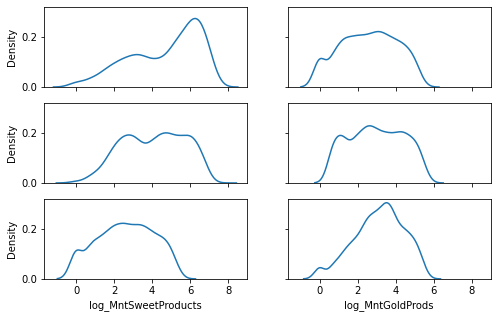

In [27]:
#Visualisasi distribusi setelah dilakukan log transformation
fig, axes = plt.subplots(3, 2, 
                     figsize=(8, 5), sharex=True, sharey=True)

sns.kdeplot(x = 'log_MntWines', data = df, ax=axes[0][0])
sns.kdeplot(x = 'log_MntFruits', data = df, ax=axes[0][1])
sns.kdeplot(x = 'log_MntMeatProducts', data = df, ax=axes[1][0])
sns.kdeplot(x = 'log_MntFishProducts', data = df, ax=axes[1][1])
sns.kdeplot(x = 'log_MntSweetProducts', data = df, ax=axes[2][0])
sns.kdeplot(x = 'log_MntGoldProds', data = df, ax=axes[2][1]);


## Feature Encoding

* Pada kolom Education bertipe data ordinal. Akan dilakukan label encoding
* Pada kolom Marital_Status akan dilakukan one hot encoding


In [28]:
for col in ['Education']:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()
    
for col in ['Marital_Status']:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Education:
Graduation    1107
PhD            468
Master         361
2n Cycle       199
Basic           54
Name: Education, dtype: int64

Value count kolom Marital_Status:
Married     845
Together    567
Single      467
Divorced    227
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



In [29]:
#Label Encoding Kolom Education
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    '2n Cycle' : 2,
    'Master' : 2,
    'PhD' : 3
}

df['Education'] = df['Education'].map(mapping_education)

In [30]:
# One hot encoding kolom Marital_Status
for cat in ['Marital_Status']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [32]:
#Menghapus kolom yang outdated
df = df.drop(columns=['Marital_Status'])
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,...,log_MntSweetProducts,log_MntGoldProds,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,1,58138.0,0,0,2012-09-04,58,3,8,...,4.477337,4.477337,0,0,0,0,1,0,0,0
1,2174,1954,1,46344.0,1,1,2014-03-08,38,2,1,...,0.000000,1.791759,0,0,0,0,1,0,0,0
2,4141,1965,1,71613.0,0,0,2013-08-21,26,1,8,...,3.044522,3.737670,0,0,0,0,0,1,0,0
3,6182,1984,1,26646.0,1,0,2014-02-10,26,2,2,...,1.098612,1.609438,0,0,0,0,0,1,0,0
4,5324,1981,3,58293.0,1,0,2014-01-19,94,5,5,...,3.295837,2.708050,0,0,0,1,0,0,0,0


## Class Imbalance

<AxesSubplot:xlabel='Response', ylabel='count'>

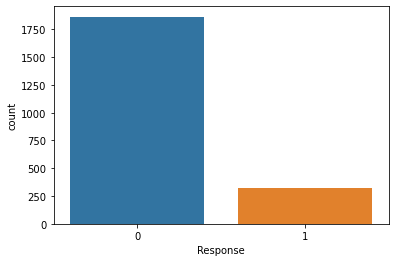

In [33]:
sns.countplot(x = 'Response', data = df)

In [34]:
print(df['Response'].value_counts())
print('Rasio', (len(df)-df['Response'].sum())/ len(df), (df['Response'].sum()/ len(df)))

0    1864
1     325
Name: Response, dtype: int64
Rasio 0.8515303791685701 0.14846962083142987


In [35]:
# pemisahan features vs target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Response']]]
y = df['Response'].values
print(X.shape)
print(y.shape)

(2189, 34)
(2189,)


In [41]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)

C:\Users\Dewi Rahmawati\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
C:\Users\Dewi Rahmawati\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [42]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())

Original
0    1864
1     325
dtype: int64


UNDERSAMPLING
0    650
1    325
dtype: int64


OVERSAMPLING
0    1864
1     932
dtype: int64


# Feature Engineering

## Feature Selection

Dalam dataset ini kami akan menghapus kolom-kolom yang memiliki banyak nilai unik yaitu ID, dan kolom Z_CostContact, dan Z_Revenue juga akan dihapus

In [34]:
df = df.drop(columns=['ID','Z_CostContact','Z_Revenue'])
df.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,1,58138.0,0,0,2012-09-04,58,3,8,10,...,4.477337,6.302619,5.147494,4.477337,4.477337,0,0,1,0,0
1,1954,1,46344.0,1,1,2014-03-08,38,2,1,1,...,0.000000,1.791759,0.693147,0.000000,1.791759,0,0,1,0,0
2,1965,1,71613.0,0,0,2013-08-21,26,1,8,2,...,3.891820,4.844187,4.709530,3.044522,3.737670,0,0,0,1,0
3,1984,1,26646.0,1,0,2014-02-10,26,2,2,0,...,1.386294,2.995732,2.302585,1.098612,1.609438,0,0,0,1,0
4,1981,3,58293.0,1,0,2014-01-19,94,5,5,3,...,3.761200,4.770685,3.828641,3.295837,2.708050,0,1,0,0,0


## Feature Extraction

* Total Spent
* Total Number of Purchase
* Kolom Usia

**Menambah kolom total_amount dan total_purchases**

In [36]:
df_purchases = pd.read_csv('marketing_campaign.csv', sep = ';')
#Menambahkan kolom total jumlah belanja  (total amount spent)
df['total_amount'] = df_purchases['MntWines'] + df_purchases['MntFruits'] + df_purchases['MntMeatProducts'] + df_purchases['MntFishProducts'] + df_purchases['MntSweetProducts'] + df_purchases['MntGoldProds']

#Menambahkan kolom total berapa kali pembelian (number of purchases)
df_purchases = pd.read_csv('marketing_campaign.csv', sep = ';')
df['total_purchases'] = df_purchases['NumDealsPurchases']+ df_purchases['NumWebPurchases'] + df_purchases['NumCatalogPurchases'] + df_purchases['NumStorePurchases']

#Menampilkan dataframe
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,total_amount,total_purchases
0,5524,1957,1,58138.0,0,0,2012-09-04,58,3,8,...,0,0,0,0,1,0,0,0,1617,25
1,2174,1954,1,46344.0,1,1,2014-03-08,38,2,1,...,0,0,0,0,1,0,0,0,27,6
2,4141,1965,1,71613.0,0,0,2013-08-21,26,1,8,...,0,0,0,0,0,1,0,0,776,21
3,6182,1984,1,26646.0,1,0,2014-02-10,26,2,2,...,0,0,0,0,0,1,0,0,53,8
4,5324,1981,3,58293.0,1,0,2014-01-19,94,5,5,...,0,0,0,1,0,0,0,0,422,19


**Menambahkan kolom Age**

In [37]:
df['Age'] = 2022 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,total_amount,total_purchases,Age
0,5524,1957,1,58138.0,0,0,2012-09-04,58,3,8,...,0,0,0,1,0,0,0,1617,25,65
1,2174,1954,1,46344.0,1,1,2014-03-08,38,2,1,...,0,0,0,1,0,0,0,27,6,68
2,4141,1965,1,71613.0,0,0,2013-08-21,26,1,8,...,0,0,0,0,1,0,0,776,21,57
3,6182,1984,1,26646.0,1,0,2014-02-10,26,2,2,...,0,0,0,0,1,0,0,53,8,38
4,5324,1981,3,58293.0,1,0,2014-01-19,94,5,5,...,0,0,1,0,0,0,0,422,19,41
